# Assignment 
Build a multiple linear regression model for the prediction of demand for shared bikes

# Problem Statement
Company want to understand the factors affecting the demand for the shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands
3. Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal:
Company required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


# Interpretation of Data
1) Reading/understanding/Visualising the data
2) Preparing the data for modelling
3) Training the model
4) Residual analysis
5) Prediction and Evaluation on the test data


In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# Step 1 - Reading and Understanding the Data

In [281]:
df =  pd.read_csv("day.csv")
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [282]:
df.shape

(730, 16)

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [284]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [285]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [286]:
df.size

11680

In [287]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [288]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### Dropping columns

* Record Index
* dteday
* Casual and Registered


In [289]:
df.drop(["instant", "dteday", "casual", "registered"], axis=1, inplace=True)

In [290]:
df.shape

(730, 12)

# Business Problem Statement 
Company required to model the demand for shared bikes with the available independent variables.

### Attributes Information
	- instant: record index  ---> Dropped
	- dteday : date ---> Dropped
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users ---> Dropped
	- registered: count of registered users ---> Dropped
	- cnt: count of total rental bikes including both casual and registered



In [291]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [292]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [293]:
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [294]:
num_col = ["cnt", "temp", "atemp", "hum", "windspeed"]
cat_col = ["yr", "holiday", "workingday", "weathersit","season", "mnth", "weekday"]

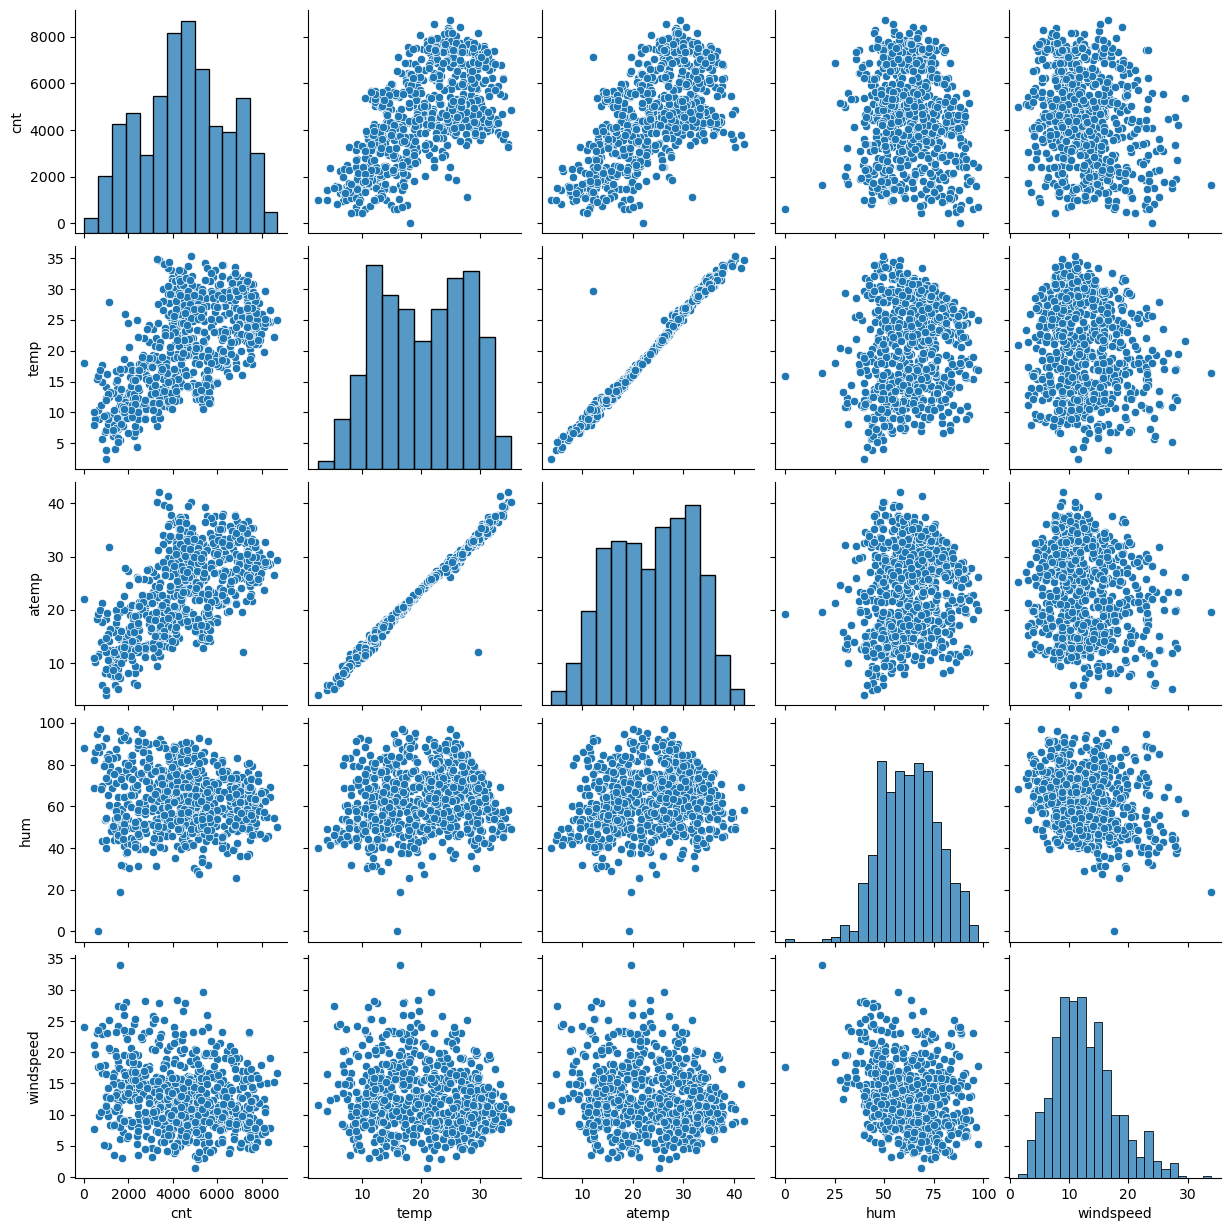

(0, 'yr')
(1, 'holiday')
(2, 'workingday')
(3, 'weathersit')
(4, 'season')
(5, 'mnth')
(6, 'weekday')


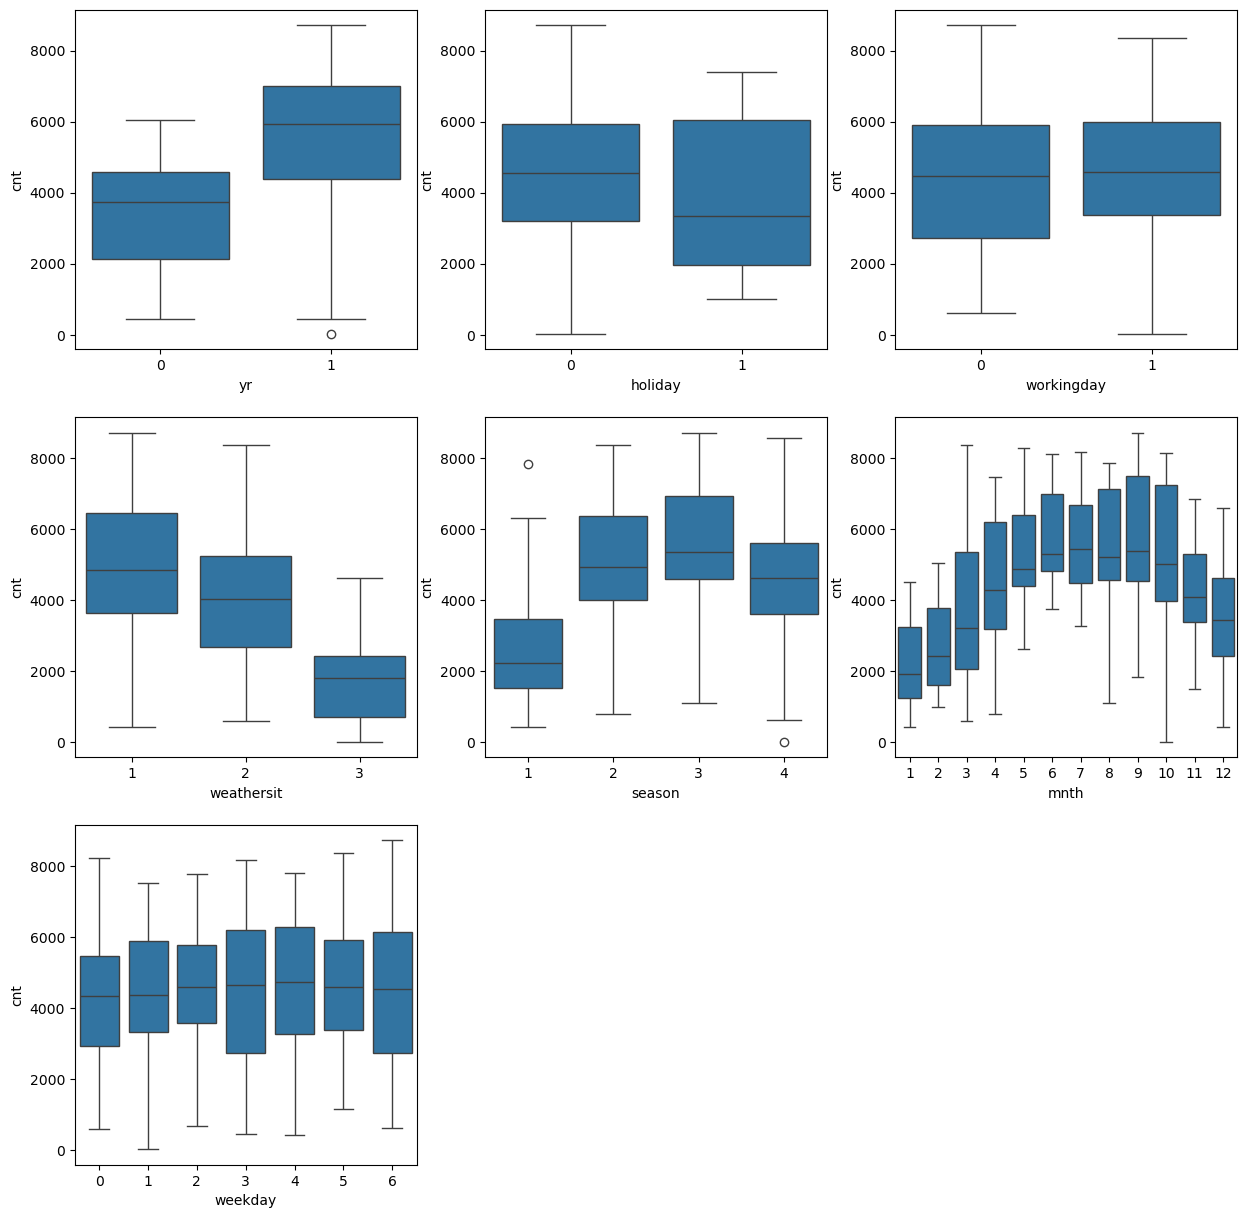

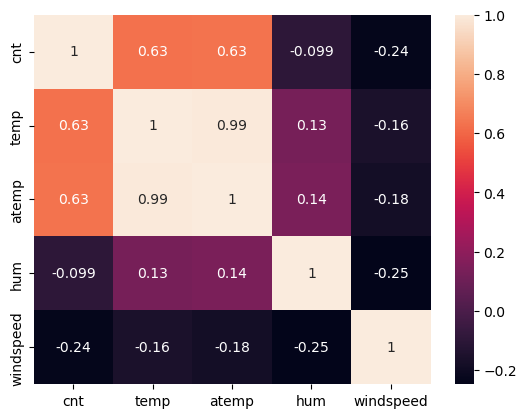

In [295]:
# Univariate Analysis
sns.pairplot(df[num_col])  # numerical - histplot  #categorical - countplot
plt.show()

# Bivariate Analysis     #numerical vs numerical - scatter plot  #categorical vs numerical - boxplot 
# plt.figure(figsize=(12,20))  
# plt.subplot(2,3,1)
# sns.boxplot(x="yr", y="cnt", data = df)

# plt.subplot(2,3,2)
# sns.boxplot(x="holiday", y="cnt", data = df)

# plt.subplot(2,3,3)
# sns.boxplot(x="workingday", y="cnt", data = df)

# plt.subplot(2,3,4)
# sns.boxplot(x="weathersit", y="cnt", data = df)

# plt.subplot(2,3,5)
# sns.boxplot(x="season", y="cnt", data = df)

# plt.subplot(2,3,6)
# sns.boxplot(x="mnth", y="cnt", data = df) 
# plt.show()

plt.figure(figsize=(15, 15))
for i in enumerate(cat_col):
    print(i)
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

# Multivariate Analysis
sns.heatmap(df[num_col].corr(), annot=True )
plt.show()

### When Correlation between two features is 1 and -1  it indicates high similarity and and dropping one of the highly correlated features is advisable for several reasons:

* Redundancy: Highly correlated features convey the same information, leading to redundancy. Including both may not provide additional benefits and can result in multicollinearity issues.
* Simplicity and Interpretability: A model with fewer features is simpler and more interpretable. Redundant features do not add value and can complicate the interpretation of the model’s behavior.
* Computational Efficiency: Training and running a model with fewer features are often computationally more efficient, particularly with large datasets.
* Avoiding Overfitting: Including highly correlated features may contribute to overfitting, where the model fits the training data too closely and struggles to generalize to new, unseen data.

#### Inferences:-
*  Temp and atemp are highly corelated hence we can take action to remove one of them as it can create Multicolinearity
* Temp and atemp also has high corelation with cnt variable

In [296]:
# drop column atemp
df.drop(["atemp"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


## Analysis of Categorical Variable with Target Variable

In [297]:
varlist = ['season', 'weekday', 'weathersit', 'mnth']

#df.season = df.season.apply(lambda x: x.map({ "1":"spring", "2":"summer", "3":"fall", "4":"winter"}))
df['season'] = df.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
df['weekday'] = df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df['mnth'] = df['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
df['weathersit'] = df.weathersit.map({1:"Clear", 2:"Mist", 3:"Light Snow", 4:"Rainy"})

# season_dum =  pd.get_dummies(df['season'], dtype=int, drop_first=True)  
# weekday_dum =  pd.get_dummies(df['weekday'], dtype=int, drop_first=True)  
# mnth_dum =  pd.get_dummies(df['mnth'], dtype=int, drop_first=True)  
# weathersit_dum =  pd.get_dummies(df['weathersit'], dtype=int, drop_first=True)  

In [298]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,December,0,Thursday,1,Mist,10.420847,65.2917,23.458911,2114
726,spring,1,December,0,Friday,1,Mist,10.386653,59.0000,10.416557,3095
727,spring,1,December,0,Saturday,0,Mist,10.386653,75.2917,8.333661,1341
728,spring,1,December,0,Sunday,0,Clear,10.489153,48.3333,23.500518,1796


(0, 'yr')
(1, 'holiday')
(2, 'workingday')
(3, 'weathersit')
(4, 'season')
(5, 'mnth')
(6, 'weekday')


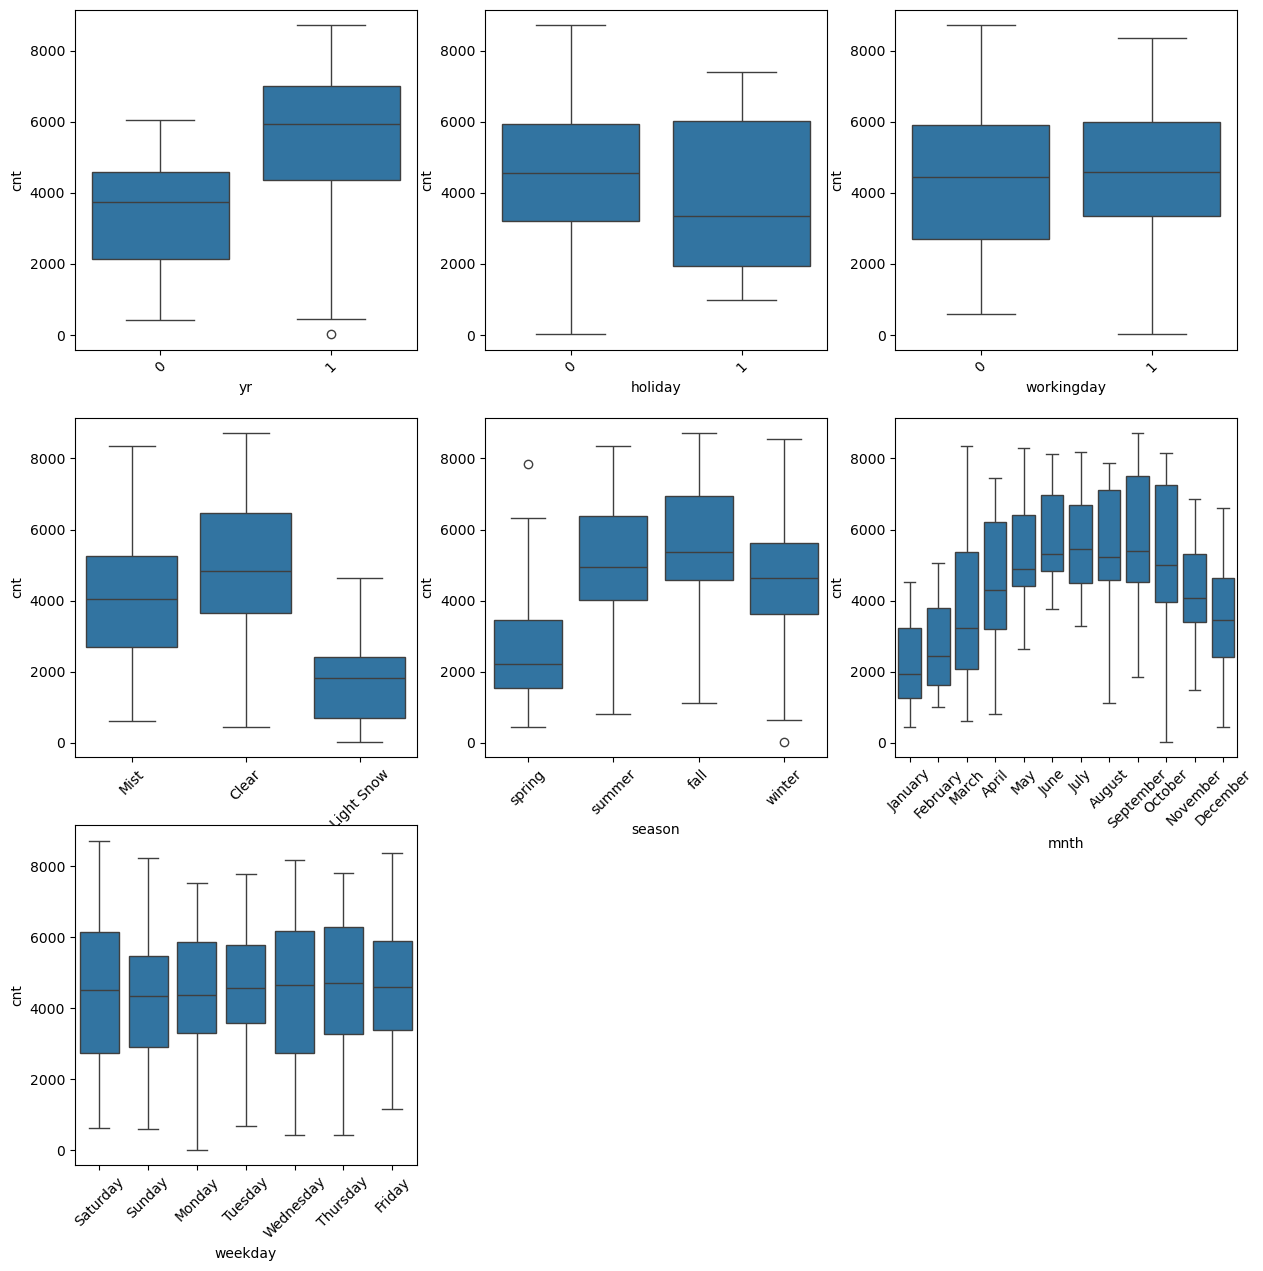

In [299]:
# Box Plot to see categorical columns to see the deman for Bike Analysis

plt.figure(figsize=(15, 15))
for i in enumerate(cat_col):
    print(i)
    plt.subplot(3,3,i[0]+1)
    a = sns.boxplot(data=df, x=i[1], y='cnt')
    a.set_xticklabels(a.get_xticklabels(), rotation=45)
plt.show()

Inferences: -
* Season 3 fall has the highest demand
* demand grown immediate next year
* demand continously growing each month till September
* demand in holiday is increased
* demand in clear climate is more
* Demand on Saturday is increased

#### Verifying with Regression plot that corealation obtained above for variables w.r.t cnt is correct

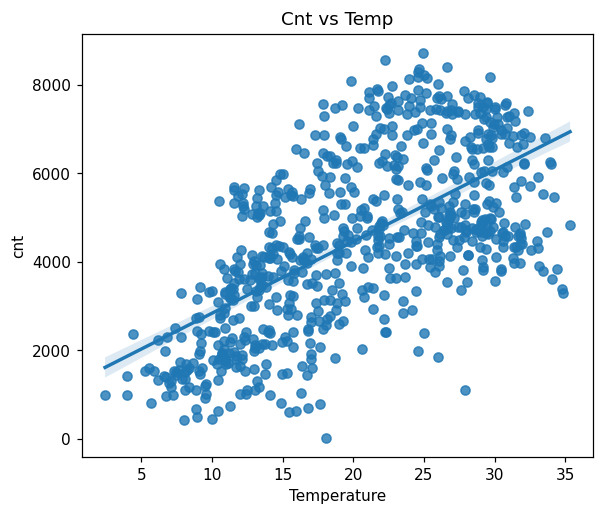

In [300]:
plt.figure(figsize=(6,5), dpi=110)
plt.title("Cnt vs Temp")
sns.regplot(data=df,y="cnt", x= "temp")
plt.xlabel("Temperature")
plt.show()

Inferences :-
Demands for bikes is highy corelated to Temp
We can see count is linearly increasing as temperature increases

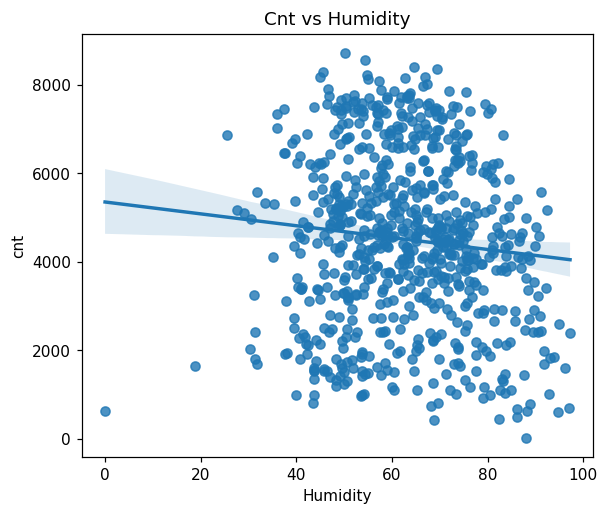

In [301]:
plt.figure(figsize=(6,5), dpi=110)
plt.title("Cnt vs Humidity")
sns.regplot(data=df,y="cnt", x= "hum")
plt.xlabel("Humidity")
plt.show()

Inferences:-
Demands is decreasing as the humidity is increasing
Demand for bike is negativley corelated with Humidity

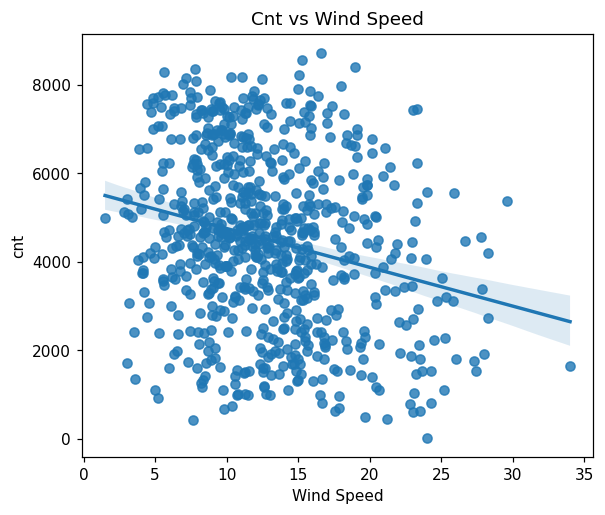

In [302]:
plt.figure(figsize=(6,5), dpi=110)
plt.title("Cnt vs Wind Speed")
sns.regplot(data=df,y="cnt", x= "windspeed")
plt.xlabel("Wind Speed")
plt.show()

Inferences:-
Demands is decreasing as the windspeed is increasing
Demand for bike is negativley corelated with Windspeed

# Step 2 - Preparing the Data for Modelling
Encoding:-
 - Converting binary 1/0
 - Converting to dummy variables

### Create dummy variables for all Categorical Variables

In [303]:
df_bikessharing =  pd.get_dummies(data=df,columns=varlist,drop_first= True, dtype=int)

In [304]:
df_bikessharing.head(5)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [305]:
df_bikessharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow',
       'weathersit_Mist', 'mnth_August', 'mnth_December', 'mnth_February',
       'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May',
       'mnth_November', 'mnth_October', 'mnth_September'],
      dtype='object')

# Step 3 - Model Building 